# Loading Data, Processing it, Exporting back into files

In [ ]:
### Run this cell to import the packages you will need to unpack the dataset
# File manipulation and IO (input/output)
import os
import pickle
import zipfile

# Import numerical and dataframe handling
import numpy as np
import scipy
import pandas as pd

# Data preprocessing
from PIL import Image
from sklearn.utils import shuffle

# Model scoring
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import standard machine learning machinery
import tensorflow as tf

# Garbage collection (for saving RAM during training)
import gc

# Import plotting functionality
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
import matplotlib

/shared-libs/python3.10/py/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-07-29 13:52:11.379912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-29 13:52:11.482209: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-29 13:52:12.007018: W tensorflow/compiler/xla/stream_executor/platform

In [ ]:
import os
os.getcwd()
!ls ../

_deepnote_work	isicdataset


In [ ]:
# should be 26472
path = "../isicdataset/ISIC-images/"

# Checking out the Data (Visualization and whatnot)

In [ ]:
df_main = pd.read_csv(path + 'metadata.csv')
df_main

,isic_id,attribution,copyright_license,acquisition_day,age_approx,anatom_site_general,benign_malignant,clin_size_long_diam_mm,concomitant_biopsy,dermoscopic_type,...,mel_class,mel_mitotic_index,mel_thick_mm,mel_type,mel_ulcer,melanocytic,nevus_type,patient_id,personal_hx_mm,sex
0,ISIC_0000000,Anonymous,CC-0,NaN,55,anterior torso,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
1,ISIC_0000001,Anonymous,CC-0,NaN,30,anterior torso,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
2,ISIC_0000002,Anonymous,CC-0,NaN,60,upper extremity,malignant,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,female
3,ISIC_0000003,Anonymous,CC-0,NaN,30,upper extremity,benign,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male
4,ISIC_0000004,Anonymous,CC-0,NaN,80,posterior torso,malignant,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26469,ISIC_9991967,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,366.0,70,lower extremity,benign,NaN,False,contact polarized,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2507276,NaN,male
26470,ISIC_9995691,"ViDIR Group, Department of Dermatology, Medica...",CC-BY-NC,NaN,50,upper extremity,benign,NaN,False,contact polarized,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_2358028,NaN,male
26471,ISIC_9997614,Memorial Sloan Kettering Cancer Center,CC-BY-NC,407.0,50,upper extremity,benign,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,IP_1705144,NaN,female
26472,ISIC_9998682,Sydney Melanoma Diagnostic Center at Royal Pri...,CC-BY-NC,NaN,60,head/neck,malignant,NaN,True,NaN,...,melanoma in situ,NaN,NaN,NaN,NaN,True,NaN,IP_2516168,NaN,male


In [ ]:
df = df_main[["isic_id", "age_approx", "lesion_id", "sex", "anatom_site_general", "benign_malignant", "diagnosis", "melanocytic"]]
df

,isic_id,age_approx,lesion_id,sex,anatom_site_general,benign_malignant,diagnosis,melanocytic
0,ISIC_0000000,55,NaN,female,anterior torso,benign,nevus,True
1,ISIC_0000001,30,NaN,female,anterior torso,benign,nevus,True
2,ISIC_0000002,60,NaN,female,upper extremity,malignant,melanoma,True
3,ISIC_0000003,30,NaN,male,upper extremity,benign,nevus,True
4,ISIC_0000004,80,NaN,male,posterior torso,malignant,melanoma,True
...,...,...,...,...,...,...,...,...
26469,ISIC_9991967,70,IL_8517155,male,lower extremity,benign,nevus,True
26470,ISIC_9995691,50,IL_9665629,male,upper extremity,benign,nevus,True
26471,ISIC_9997614,50,IL_5910182,female,upper extremity,benign,nevus,True
26472,ISIC_9998682,60,IL_1802809,male,head/neck,malignant,melanoma,True


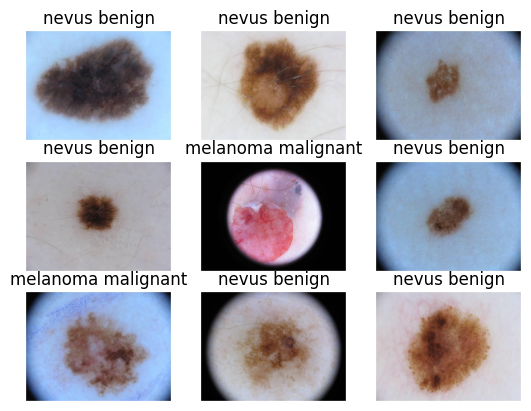

In [ ]:
from PIL import Image

# visualize data
fig, ax = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(np.asarray(Image.open(f"{path}{df['isic_id'][3*j+i]}.jpg")))
        ax[i, j].set_axis_off()
        ax[i, j].set_title(df["diagnosis"][3*j+i] + " " + df["benign_malignant"][3*j+i])

# hide output because i dont want to see it

In [ ]:
Image.open(f"{path}ISIC_0000000.jpg").width

1022

### Graph by Sex

<AxesSubplot: xlabel='sex'>

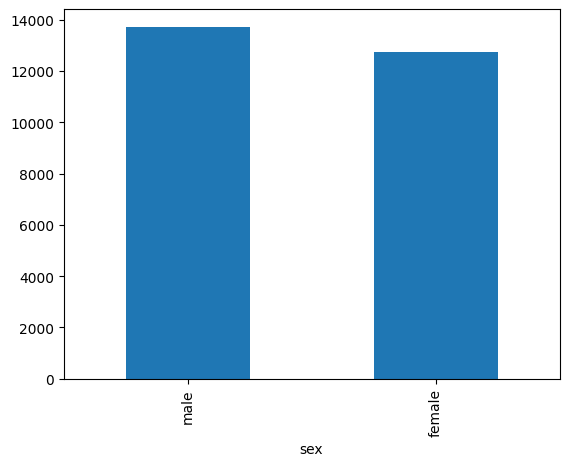

In [ ]:
df["sex"].value_counts().plot(kind="bar")

### Graph by Age

<AxesSubplot: xlabel='age_approx'>

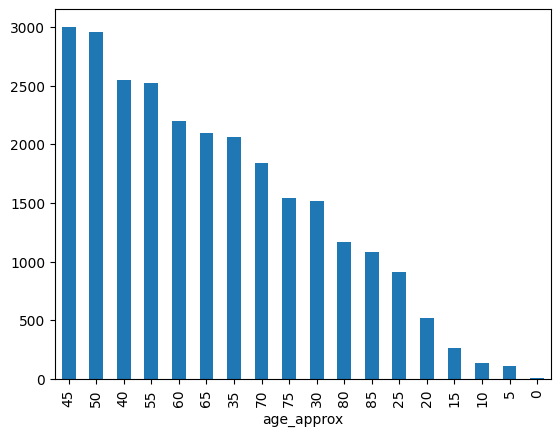

In [ ]:
df["age_approx"].value_counts().plot(kind="bar")

### Graph by Localization

<AxesSubplot: xlabel='anatom_site_general'>

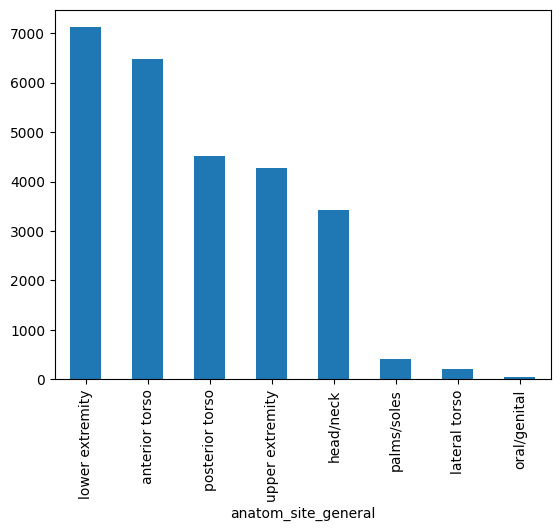

In [ ]:
df["anatom_site_general"].value_counts().plot(kind="bar")

### Graph by Cancer Type

<AxesSubplot: xlabel='diagnosis'>

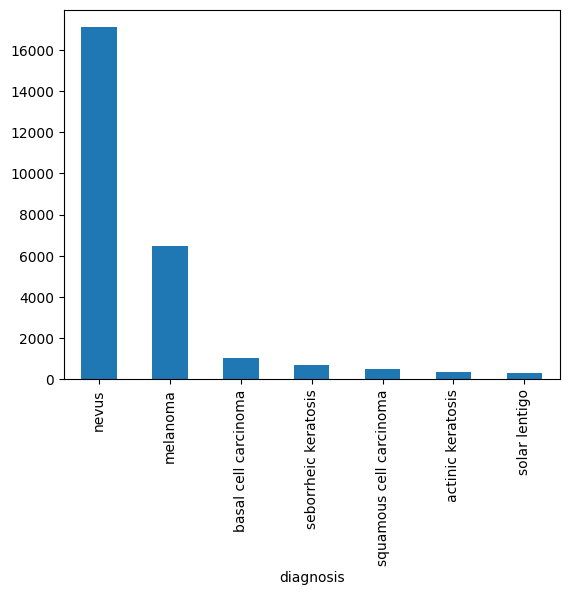

In [ ]:
df["diagnosis"].value_counts().plot(kind="bar")

<AxesSubplot: xlabel='benign_malignant'>

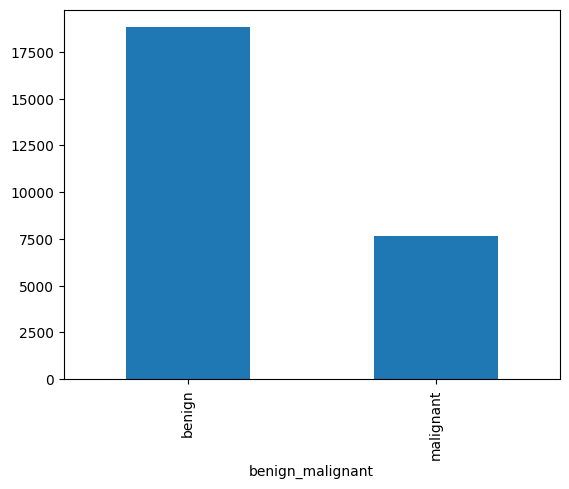

In [ ]:
df["benign_malignant"].value_counts().plot(kind="bar")

# Data Pre-Processing

### 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d80955c4-ad7b-4eff-b971-b372a13f61b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>